In [14]:
import numpy as np
import os
d = 5  # Dimensionality
num_samples = 10000  # Total number of samples
x = np.random.uniform(-1, 1, size=(num_samples, d))

In [15]:
def phi_q(z):
    return np.sin(z) + 0.5 * z**2

def psi_qp(x):
    return np.log1p(np.abs(x)) + x**2


In [16]:
def generate_output(x, d):
    q_range = 2 * d + 1
    result = 0
    for q in range(q_range):
        inner_sum = np.sum([psi_qp(x[:, p]) for p in range(d)], axis=0)
        result += phi_q(inner_sum)
    return result

y = generate_output(x, d)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)


In [18]:
output_dir = "/Users/mihirtrivedi/Desktop/DL_Project"
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Save the dataset
np.savez_compressed(
    os.path.join(output_dir, "kolmogorov_arnold_dataset.npz"),
    X_train=X_train, X_val=X_val, X_test=X_test,
    y_train=y_train, y_val=y_val, y_test=y_test
)

print(f"Dataset successfully saved to {output_dir}")


Dataset successfully saved to /Users/mihirtrivedi/Desktop/DL_Project


In [20]:
data = np.load("/Users/mihirtrivedi/Desktop/DL Project/kolmogorov_arnold_dataset.npz")


In [21]:
print(data.files)  # Lists the arrays stored in the file
print(data['X_train'].shape, data['y_train'].shape)
print(data['X_val'].shape, data['y_val'].shape)
print(data['X_test'].shape, data['y_test'].shape)


['X_train', 'X_val', 'X_test', 'y_train', 'y_val', 'y_test']
(7225, 5) (7225,)
(1275, 5) (1275,)
(1500, 5) (1500,)


In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [23]:
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the validation and test sets
y_val_pred = linear_model.predict(X_val)
y_test_pred = linear_model.predict(X_test)


In [24]:
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


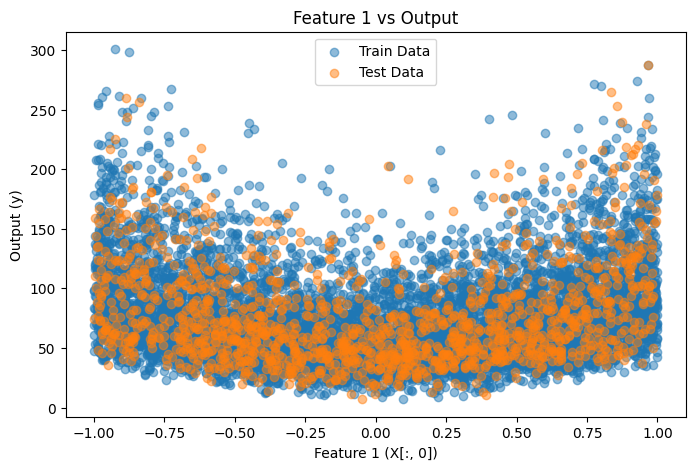

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 0], y_train, alpha=0.5, label='Train Data')
plt.scatter(X_test[:, 0], y_test, alpha=0.5, label='Test Data')
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Output (y)")
plt.title("Feature 1 vs Output")
plt.legend()
plt.show()


In [26]:
# Return evaluation metrics
{
    "Validation MSE": val_mse,
    "Validation R^2": val_r2,
    "Test MSE": test_mse,
    "Test R^2": test_r2
}

{'Validation MSE': 1509.8419215643037,
 'Validation R^2': -0.002272586497067408,
 'Test MSE': 1711.2008689466727,
 'Test R^2': -0.0007228154057390412}